# Práctica 2: PCA - Red Wine

**Román Alberto Vélez Jiménez**

CU: 165462

De la base de datos [red wine](!https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/) de kaggle, se hará un análisis PCA.

In [146]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px


# Parte 1: Data

## Lectura de Datos

In [147]:
# read data from numpy
red_wine = pd.read_csv("data/winequality-red.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [149]:
# drop 'quality'
quality_by_wine = red_wine['quality'].copy()
quality_by_wine = 'quality_' + quality_by_wine.astype(str)
red_wine = red_wine.drop('quality', axis='columns')

## Preparando los Datos

In [150]:
# get numpy array
X = red_wine.copy().to_numpy()
X.shape

(1599, 11)

In [151]:
# scale array
Xstand = X - np.mean(X, axis=0)
Xstand = np.divide(Xstand, np.std(Xstand, ddof=1, axis=0))

In [152]:
# look if the data is centered
print(f"data is centered: {np.all(np.isclose(Xstand.mean(axis=0), 0))}")

# look if the data is centered
print(f"data is scaled: {np.all(np.isclose(Xstand.std(axis=0, ddof=1), 1))}")

data is centered: True
data is scaled: True


In [153]:
# variance-covariance matrix
m_size = Xstand.shape[0]
S = (1 / (m_size - 1)) * (Xstand.T @ Xstand)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Mapa de Calor

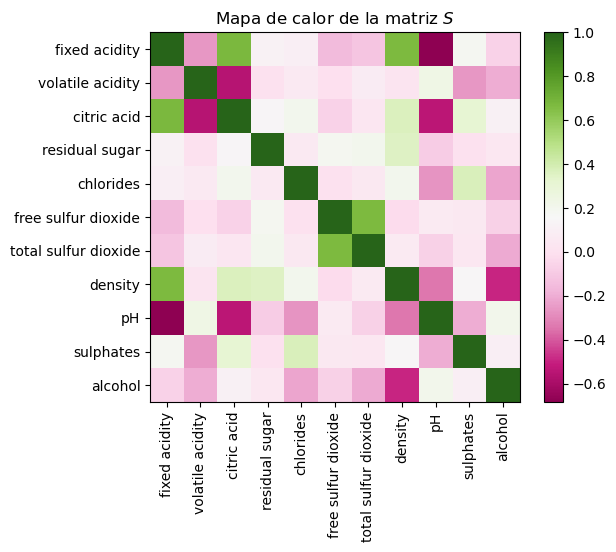

In [201]:
# create a heatmap
plt.imshow(S, cmap='PiYG', interpolation='nearest')
plt.colorbar()
# add ticks
plt.xticks(range(len(red_wine.columns)), red_wine.columns, rotation=90)
plt.yticks(range(len(red_wine.columns)), red_wine.columns, rotation=0)
# add title
plt.title("Mapa de calor de la matriz $S$")
# Display the plot or save it to a file
plt.show()

# Parte 2: PCA

## Cálculo de eigenvectores de $S = A^{T}A$

In [155]:
# get eigenvectors
eigvalues, eigvectors = np.linalg.eig(S)

## Proyección Datos

In [156]:
# proyect data
Xstand_proy = Xstand @ eigvectors

# Parte 3: Varianza Acumulada

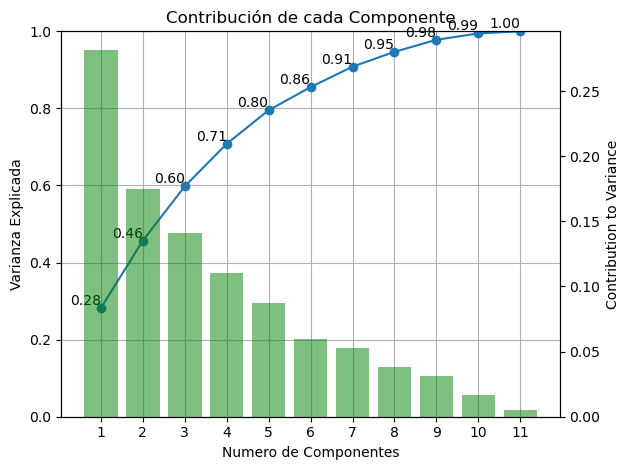

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming eigvalues is a numpy array containing the eigenvalues
# Sort the eigenvalues in descending order
eigvalues.sort()
eigvalues = eigvalues[::-1]

# Calculate the cumulative explained variance
cumulative_variance = eigvalues.cumsum() / eigvalues.sum()

# Create a figure and axis for the cumulative variance explained graph
fig, ax = plt.subplots()

# Plot the cumulative explained variance
ax.plot(np.arange(1, eigvalues.size + 1), cumulative_variance, '-o')

# Set better formatting for the tick labels
ax.set_xticks(np.arange(1, eigvalues.size + 1))
ax.set_xticklabels(np.arange(1, eigvalues.size + 1))
ax.set_xlabel("Numero de Componentes")
ax.set_ylabel("Varianza Explicada")
ax.grid(True)

# Annotate data points with y-values
for i, var in enumerate(cumulative_variance):
    ax.text(i + 1, var, f'{var:.2f}', ha='right', va='bottom')

# set limits
ax.set_ylim(0, 1)

# Create a bar chart for individual contributions
individual_contributions = eigvalues / eigvalues.sum()
x = np.arange(1, eigvalues.size + 1)
ax2 = ax.twinx()  # Create a secondary y-axis
ax2.bar(x, individual_contributions, align='center', alpha=0.5, color='g', label='Contribución Individual')
ax2.set_ylabel("Contribution to Variance")

# Show the plot
plt.title("Contribución de cada Componente")
plt.tight_layout()
plt.show()

# Parte 4: Contribución

Doubt: does the PC is the column of eigenvecs or the rows?

In [158]:
# look eigenvectors
df_eig = pd.DataFrame(
    eigvectors,
    columns=['PC' + str(i+1) for i in range(eigvalues.size)],
    index=red_wine.columns
)
df_eig

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,-0.639691,-0.249523,0.194021,-0.177595,-0.350227,0.101479
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735,-0.002389,0.365925,-0.129110,-0.078775,-0.533735,0.411449
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573,0.070910,0.621677,-0.381450,-0.377516,0.105497,0.069593
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144,-0.184030,0.092872,0.007523,0.299845,0.290663,0.049156
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501,-0.053065,-0.217671,0.111339,-0.357009,0.370413,0.304339
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152,0.051421,0.248483,0.635405,-0.204781,-0.116596,-0.014000
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465,-0.068702,-0.370750,-0.592116,0.019036,-0.093662,0.136308
density,0.395353,0.233575,-0.338871,-0.174500,0.157077,0.567332,-0.239990,0.020719,-0.239223,-0.170481,-0.391152
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530,-0.340711,-0.010970,-0.167746,-0.561391,-0.025138,-0.522116
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962,-0.069555,0.112320,-0.058367,0.374604,-0.447469,-0.381263


In [159]:
# for each component, get the index with highest value
list_max_contr = []
for name, pc in df_eig.T.iterrows():
    # get maximum contributor
    pc = pc.sort_values(key=np.abs, ascending=False) # sort by abs value
    max_value = pc[0]
    max_contrib_var = pc.index[0]
    # save
    list_max_contr.append((name, max_contrib_var, max_value))

# to dataframe
pd.DataFrame(list_max_contr, columns=['PC', 'variable', 'contribution']).set_index('PC')


,variable,contribution
PC,,
PC1,fixed acidity,0.489314
PC2,total sulfur dioxide,0.569487
PC3,alcohol,0.471673
PC4,chlorides,0.666195
PC5,residual sugar,0.732144
PC6,fixed acidity,-0.639691
PC7,citric acid,0.621677
PC8,free sulfur dioxide,0.635405
PC9,pH,-0.561391


In [160]:
# look S matrix
pd.DataFrame(
    S,
    columns=red_wine.columns,
    index=red_wine.columns
)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


# Parte 5: Biplot

## 3D

In [213]:
# Create a DataFrame with your data
df = pd.DataFrame(Xstand_proy[:, :3], columns=["PC1", "PC2", "PC3"])
df["quality"] = pd.Categorical(quality_by_wine, categories=quality_by_wine.sort_values().unique(), ordered=True)
df = df.sort_values('quality', ascending=False)

# Create an interactive 3D scatter plot with the "Viridis" color scale
fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color="quality", title="Primeras 3 Componentes Principales", color_discrete_sequence=px.colors.sequential.Viridis_r)

# Add a legend
fig.update_traces(marker=dict(size=3), selector=dict(mode='markers'), showlegend=True)

# Show the plot
fig.show()


## 2D

In [174]:
df['quality'].cat.codes.unique()

array([2, 3, 4, 1, 5, 0], dtype=int8)

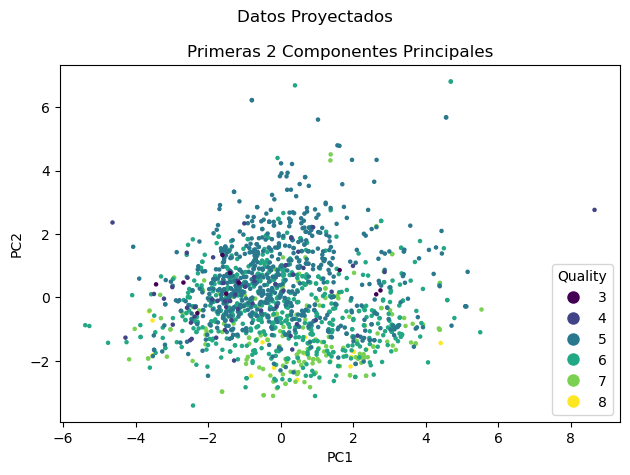

In [199]:
# Scatter plot of the first two vectors
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['quality'].cat.codes, cmap='viridis', s=5)

# Add labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Create a legend
quality_values = df['quality'].sort_values().cat.codes.unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(quality_values[i])),
                              markersize=10, label=quality_values[i]+3) for i in range(len(quality_values))]
plt.legend(handles=legend_elements, title='Quality')

# Show the plot
plt.suptitle("Datos Proyectados")
plt.title("Primeras 2 Componentes Principales")
plt.tight_layout()
plt.show()